主成分分析と因果分析の比較をわかりやすく説明した記事    
https://www.intage.co.jp/glossary/050/

In [1]:
import numpy as np               
import matplotlib.pyplot as plt  
import pandas as pd

# 主成分分析

In [7]:
from sklearn.decomposition import PCA    # sklearn の PCA を使う．
dat = pd.read_csv('data/Davis.csv').values    # データ読み込み(pandasを使う)
labels = pd.read_csv('data/Davis.csv').columns

In [5]:
dat.shape

(200, 5)

In [8]:
labels

Index(['sex', 'weight', 'height', 'repwt', 'repht'], dtype='object')

In [6]:
dat[:5]

array([['M', 77, 182, 77.0, 180.0],
       ['F', 58, 161, 51.0, 159.0],
       ['F', 53, 161, 54.0, 158.0],
       ['M', 68, 177, 70.0, 175.0],
       ['F', 59, 157, 59.0, 155.0]], dtype=object)

In [15]:
# 身長の単位を[メートル]に変換し，対数の値を計算．
logdat = np.log(np.c_[dat[:,1],dat[:,2]/100].astype('float'))
# np.log()はfloatしか受け付けない。weightがintなのでastypeしないとエラーが出る

In [16]:
# np.c_[array1,array2]はnp.vstack((array1,array2))と同じような結合
# np.r_[array1,array2]はnp.hstack((array1,array2))と同じような結合

In [17]:
logdat[:5]

array([[4.34380542, 0.5988365 ],
       [4.06044301, 0.47623418],
       [3.97029191, 0.47623418],
       [4.21950771, 0.57097955],
       [4.07753744, 0.45107562]])

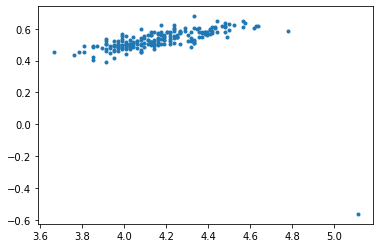

In [18]:
# データのプロット
plt.plot(logdat[:,0], logdat[:,1], '.'); plt.show()

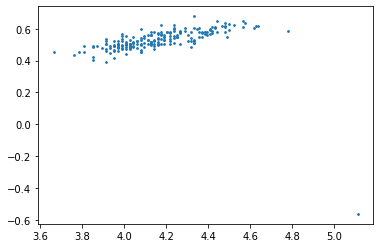

In [22]:
# データのプロット
plt.scatter(logdat[:,0], logdat[:,1], s=3); plt.show()

In [27]:
# データに主成分分析
pca = PCA()    
pca.fit(logdat) 
pca.components_       # 主成分

array([[ 0.99672116,  0.08091309],
       [ 0.08091309, -0.99672116]])

In [28]:
# インデックス 11 のデータは外れ値として除去．
clean_logdat = np.delete(logdat, 11, axis=0)

# 外れ値を除去したデータに主成分分析
pca = PCA()    
pca.fit(clean_logdat) 
pca.components_       # 主成分

array([[ 0.97754866,  0.21070979],
       [-0.21070979,  0.97754866]])

In [67]:
import seaborn as sns
sns.set()
dat2 = pd.read_csv('data/Davis.csv')
dat2.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [68]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     200 non-null    object 
 1   weight  200 non-null    int64  
 2   height  200 non-null    int64  
 3   repwt   183 non-null    float64
 4   repht   183 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [73]:
dat2[dat2.isnull().any(axis=1)]

,sex,weight,height,repwt,repht
46,M,73,180,NaN,NaN
47,F,49,161,NaN,NaN
54,M,64,177,NaN,NaN
56,F,66,170,65.0,NaN
75,F,50,171,NaN,NaN
99,F,55,155,NaN,154.0
124,M,67,179,NaN,NaN
125,F,52,169,56.0,NaN
126,F,47,153,NaN,154.0
137,F,62,167,NaN,NaN


In [74]:
dat3 = dat2.copy()
dat3['repwt'].fillna(dat3['weight'], inplace=True)
dat3['repht'].fillna(dat3['height'], inplace=True)
dat3[dat3.isnull().any(axis=1)]

,sex,weight,height,repwt,repht


In [75]:
dat3.describe()

,weight,height,repwt,repht
count,200.000000,200.000000,200.00000,200.000000
mean,65.800000,170.020000,65.25000,168.665000
std,15.095009,12.007937,13.67856,9.312701
min,39.000000,57.000000,41.00000,148.000000
25%,55.000000,164.000000,55.00000,161.000000
50%,63.000000,169.500000,62.00000,168.500000
75%,74.000000,177.250000,73.00000,175.000000
max,166.000000,197.000000,124.00000,200.000000


In [76]:
dat3 = dat3[dat3['weight']<165]
dat3.describe()

,weight,height,repwt,repht
count,199.000000,199.000000,199.000000,199.000000
mean,65.296482,170.587940,65.296482,168.693467
std,13.343463,8.948848,13.697214,9.327461
min,39.000000,148.000000,41.000000,148.000000
25%,55.000000,164.000000,55.000000,161.000000
50%,63.000000,170.000000,62.000000,169.000000
75%,73.500000,177.500000,73.000000,175.000000
max,119.000000,197.000000,124.000000,200.000000


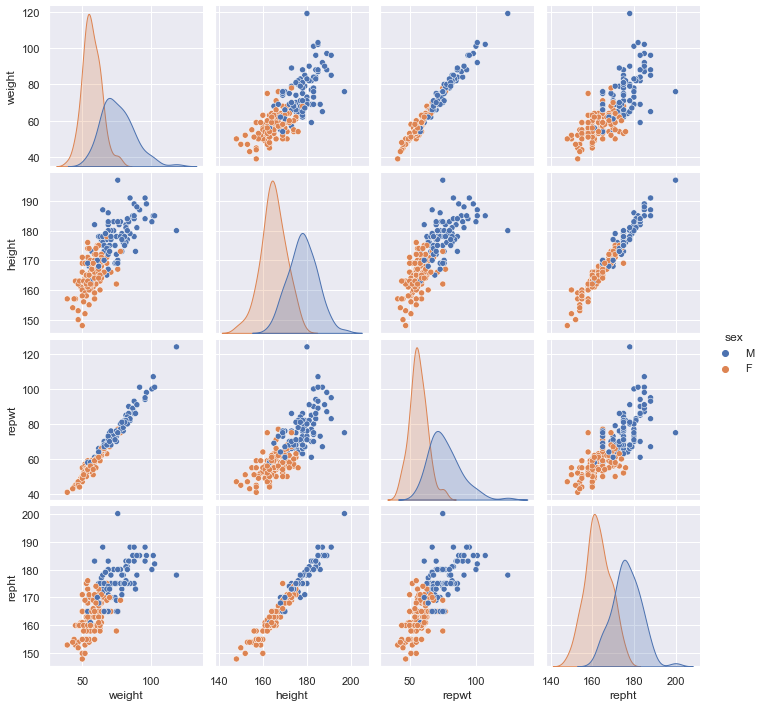

In [77]:
sns.pairplot(data=dat3, hue='sex')

In [78]:
dat_for_pca = dat3.iloc[:,1:]
dat_for_pca.head()

,weight,height,repwt,repht
0,77,182,77.0,180.0
1,58,161,51.0,159.0
2,53,161,54.0,158.0
3,68,177,70.0,175.0
4,59,157,59.0,155.0


In [79]:
from sklearn.preprocessing import StandardScaler
lab = dat_for_pca.columns
sc = StandardScaler()
dat_std = sc.fit_transform(dat_for_pca)
df_dat_std = pd.DataFrame(data=dat_std, columns=lab)
df_dat_std.describe()

,weight,height,repwt,repht
count,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02
mean,1.338962e-16,1.579976e-15,1.071170e-16,-9.551265e-16
std,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00
min,-1.975709e+00,-2.530483e+00,-1.778300e+00,-2.224149e+00
25%,-7.735961e-01,-7.380341e-01,-7.536168e-01,-8.268993e-01
50%,-1.725395e-01,-6.586575e-02,-2.412751e-01,3.294635e-02
75%,6.163473e-01,7.743447e-01,5.638334e-01,6.778306e-01
max,4.034857e+00,2.958892e+00,4.296609e+00,3.364848e+00


In [111]:
pca2 = PCA()    
pca2.fit(df_dat_std) 
pca2.components_

array([[ 0.49905259,  0.50249803,  0.50287014,  0.49554401],
       [ 0.51372288, -0.47221822,  0.48316312, -0.52882148],
       [-0.05866732,  0.72255525,  0.01482823, -0.68865969],
       [-0.69540884, -0.04918939,  0.71655785,  0.02306074]])

In [116]:
# PCA固有ベクトル
pd.DataFrame(data=pca2.components_, columns=df_dat_std.columns)

,weight,height,repwt,repht
0,0.499053,0.502498,0.502870,0.495544
1,0.513723,-0.472218,0.483163,-0.528821
2,-0.058667,0.722555,0.014828,-0.688660
3,-0.695409,-0.049189,0.716558,0.023061


In [112]:
# 主成分軸に変換
fea = pca2.transform(df_dat_std)
fea[:3]

array([[ 2.11421146, -0.38076022,  0.04799832, -0.03253912],
       [-1.85580576,  0.27097984, -0.04197695, -0.33976216],
       [-1.98612374,  0.24092318,  0.05733558,  0.076335  ]])

In [113]:
df_fea = pd.DataFrame(fea, columns=["PC{}".format(x + 1) for x in range(len(df_dat_std.columns))])
df_fea.head()

,PC1,PC2,PC3,PC4
0,2.114211,-0.380760,0.047998,-0.032539
1,-1.855806,0.270980,-0.041977,-0.339762
2,-1.986124,0.240923,0.057336,0.076335
3,0.971340,-0.426979,0.045427,0.085726
4,-1.962085,1.031444,-0.065418,0.039687


In [115]:
# 各主成分の寄与率
pd.DataFrame(pca2.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(df_dat_std.columns))])

,0
PC1,0.878004
PC2,0.112747
PC3,0.006035
PC4,0.003214


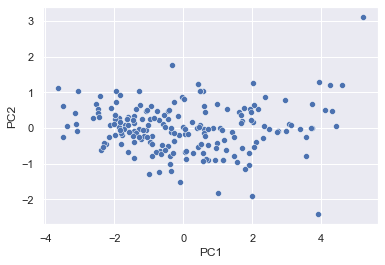

In [114]:
sns.scatterplot(x=df_fea['PC1'], y=df_fea['PC2']);

# 因子分析

In [29]:
from sklearn.datasets import load_boston  # BostonHousing を使う
BostonHousing = load_boston()             # データ読み込み

In [31]:
type(BostonHousing)

sklearn.utils.Bunch

In [34]:
BostonHousing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [36]:
BostonHousing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [41]:
print(BostonHousing.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [117]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale
X = scale(BostonHousing.data)  # データのスケーリング(相関行列に因子分解を適用)

In [118]:
X.shape                        # データ行列のサイズ：13次元506サンプル

(506, 13)

In [119]:
fa = FactorAnalysis(n_components=3)   # 因子数3で推定
rX = fa.fit_transform(X)              # 因子スコア

In [120]:
rX.shape

(506, 3)

In [121]:
fa.components_                        # 因子負荷行列

array([[ 0.6121372 , -0.4957598 ,  0.81341902,  0.00512797,  0.80406482,
        -0.3737183 ,  0.67562989, -0.71558151,  0.88828641,  0.93353022,
         0.47185072, -0.4688966 ,  0.66715612],
       [-0.14078614, -0.50308575,  0.26434287,  0.12250032,  0.3361002 ,
        -0.24617668,  0.47316763, -0.50591099, -0.31994494, -0.2548487 ,
        -0.09045084,  0.06657234,  0.27624587],
       [-0.04355955, -0.0156834 , -0.02700214,  0.18605562,  0.1230639 ,
         0.74390582,  0.12903434, -0.25659733,  0.05578977, -0.00510409,
        -0.27274263, -0.00219808, -0.39340095]])

In [136]:
pd.DataFrame(data=fa.components_, columns=BostonHousing.feature_names, index=('F1','F2','F3'))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
F1,0.612137,-0.495760,0.813419,0.005128,0.804065,-0.373718,0.675630,-0.715582,0.888286,0.933530,0.471851,-0.468897,0.667156
F2,-0.140786,-0.503086,0.264343,0.122500,0.336100,-0.246177,0.473168,-0.505911,-0.319945,-0.254849,-0.090451,0.066572,0.276246
F3,-0.043560,-0.015683,-0.027002,0.186056,0.123064,0.743906,0.129034,-0.256597,0.055790,-0.005104,-0.272743,-0.002198,-0.393401


In [122]:
fa.components_.shape                  # サイズは(因子数, 次元)

(3, 13)

In [123]:
# 因子負荷行列の要素：絶対値の大きさでソート．
BostonHousing.feature_names[np.argsort(np.abs(fa.components_[0,]))]

array(['CHAS', 'RM', 'B', 'PTRATIO', 'ZN', 'CRIM', 'LSTAT', 'AGE', 'DIS',
       'NOX', 'INDUS', 'RAD', 'TAX'], dtype='<U7')

In [163]:
df_bstn_fa = pd.DataFrame(data=np.hstack((rX,price)), columns=('F1','F2','F3','price'))
df_bstn_fa.head()

,F1,F2,F3,price
0,-0.787782,0.314201,0.545420,24.0
1,-0.826018,0.534518,-0.031075,21.6
2,-0.952037,0.155338,0.846687,34.7
3,-1.130289,-0.278502,0.456046,33.4
4,-1.101599,-0.201933,0.537047,36.2


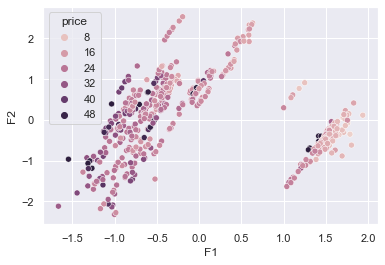

In [164]:
sns.scatterplot(data=df_bstn_fa, x='F1', y='F2', hue='price');

In [150]:
fa2 = FactorAnalysis(n_components=2)   # 因子数3で推定
rX2 = fa2.fit_transform(X)              # 因子スコア
pd.DataFrame(data=fa2.components_, columns=BostonHousing.feature_names, index=('F1','F2'))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
F1,0.608950,-0.455227,0.799431,-0.000686,0.782037,-0.335009,0.643936,-0.679897,0.900516,0.956594,0.466596,-0.467931,0.629962
F2,0.097985,0.537110,-0.304467,-0.152417,-0.405203,0.145421,-0.537223,0.565852,0.237870,0.201234,0.088897,-0.028181,-0.254746


In [165]:
df_bstn_fa2 = pd.DataFrame(data=np.hstack((rX2,price)), columns=('F1','F2','price'))
df_bstn_fa2.head()

,F1,F2,price
0,-0.755804,-0.270315,24.0
1,-0.863707,-0.534311,21.6
2,-0.931084,-0.282293,34.7
3,-1.108482,0.180770,33.4
4,-1.083984,0.080527,36.2


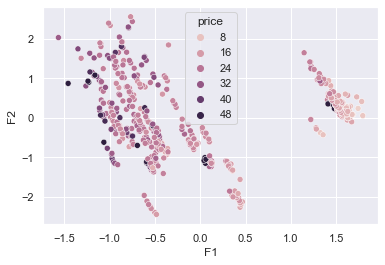

In [166]:
sns.scatterplot(data=df_bstn_fa2, x='F1', y='F2',hue='price');

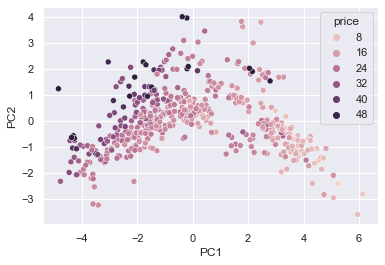

In [171]:
pc = PCA()   # pca
pX = pc.fit_transform(X)
df_bstn_pc = pd.DataFrame(data=np.hstack((pX,price)), \
                          columns=(['PC{}'.format(x + 1) for x in range(X.shape[1])]+['price']))
sns.scatterplot(data=df_bstn_pc, x='PC1', y='PC2', hue='price');

In [168]:
# 各主成分の寄与率
pc_factors = pd.DataFrame(pc.explained_variance_ratio_, index=['PC{}'.format(x + 1) for x in range(X.shape[1])])
pc_factors

,0
PC1,0.471296
PC2,0.110252
PC3,0.095586
PC4,0.065967
PC5,0.064217
PC6,0.050570
PC7,0.041181
PC8,0.030469
PC9,0.021303
PC10,0.016941


In [147]:
pc_factors.sum()

0    1.0
dtype: float64

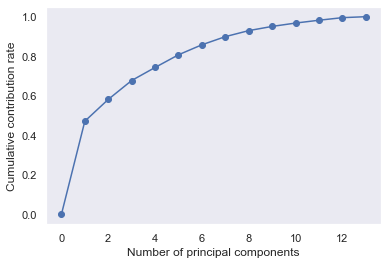

In [148]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pc.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

# 多次元尺度構成法

In [13]:
import statsmodels.api as sm
from statsmodels.multivariate.factor_rotation import rotate_factors
L, T = sm.multivariate.factor_rotation.rotate_factors(fa.components_.T,'varimax')  # バリマックス回転基準
L

array([[ 0.5663403 ,  0.21804878, -0.15162447],
       [-0.09141312, -0.6634721 ,  0.22563641],
       [ 0.48775161,  0.64424597, -0.28205468],
       [-0.06192479,  0.15857947,  0.14346569],
       [ 0.44283427,  0.74431776, -0.15648091],
       [-0.11671964, -0.14390299,  0.84939224],
       [ 0.25807616,  0.77902084, -0.15355907],
       [-0.27559021, -0.86898553,  0.05168074],
       [ 0.90199198,  0.27086566, -0.07955876],
       [ 0.89765703,  0.32435335, -0.16309324],
       [ 0.41813753,  0.10235314, -0.34578816],
       [-0.41305023, -0.21162195,  0.0920395 ],
       [ 0.34722916,  0.44876794, -0.59447461]])

In [14]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances 
n = 10                              # データ数
k = 2                               # データの次元
V = np.random.rand(n,k)             # 真の配置
d = euclidean_distances(V)          # 距離行列

In [15]:
# 計量的MDS(次元2): 10個の初期値で計算し最適な解を採用
md = MDS(n_components=2, metric=True, dissimilarity='precomputed', n_init=10, max_iter=3000)
md.fit(d)
rV2 = md.embedding_                 # 再構成された2次元点配置

In [16]:
rV2

array([[ 0.27348666, -0.21998992],
       [-0.05622866,  0.01683038],
       [-0.17860058,  0.23740999],
       [-0.0248504 ,  0.24403242],
       [ 0.0987151 , -0.57025974],
       [-0.02460902,  0.25461037],
       [ 0.15676859,  0.12504975],
       [-0.40738769, -0.3908578 ],
       [-0.04533582,  0.27824954],
       [ 0.20804183,  0.02492501]])

In [17]:
# 計量的MDS(次元1) 
md.set_params(n_components=1)          
md.fit(d)        
rV1 = md.embedding_                 # 再構成された1次元点配置

In [18]:
rV1

array([[-0.22745013],
       [ 0.05970406],
       [ 0.23815233],
       [ 0.22453378],
       [-0.62036055],
       [ 0.26214483],
       [ 0.32136358],
       [-0.51500418],
       [ 0.27985917],
       [-0.0229429 ]])

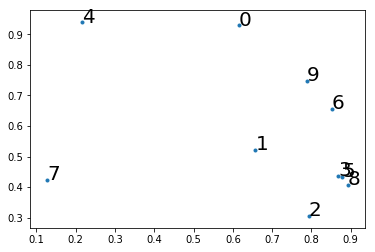

In [19]:
# 元データのプロット
plt.scatter(V[:,0],V[:,1],marker='.'); 
for i,(x,y) in enumerate(zip(V[:,0],V[:,1])): # 点番号も表示
    plt.annotate(str(i),(x,y),fontsize=20)
plt.show()

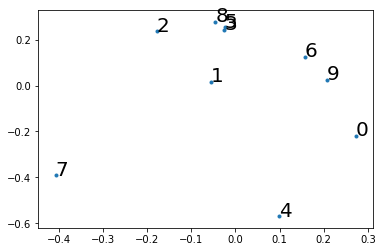

In [20]:
# 計量的MDSで再構成した点のプロット
plt.scatter(rV2[:,0],rV2[:,1],marker='.');    # 点番号も表示
for i,(x,y) in enumerate(zip(rV2[:,0],rV2[:,1])):
    plt.annotate(str(i),(x,y),fontsize=20)
plt.show()

In [21]:
from sklearn.manifold import MDS
data = pd.read_csv('data/voting.csv').values
#  S:非類似度行列(投票行動)，pidx: 所属する党(0/1)
S=data[:,:15]; pidx=data[:,15]  
col=['red','blue']; mk = ['x','o'] # 所属する党を区別するマーク

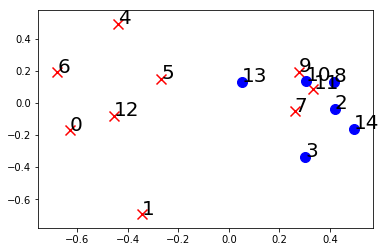

In [22]:
# 非計量的MDS
nmd = MDS(n_components=2, metric=False, dissimilarity='precomputed',  n_init=20,max_iter=3000)
nmd.fit(S)          # フィッティング
px = nmd.embedding_[:,0]; py = nmd.embedding_[:,1]
for i in [0,1]:     # プロット
    plt.scatter(px[pidx==i],py[pidx==i],c=col[i],marker=mk[i],s=100)
for i,(x,y) in enumerate(zip(px,py)):
    plt.annotate(str(i),(x,y),fontsize=20)    
plt.show()

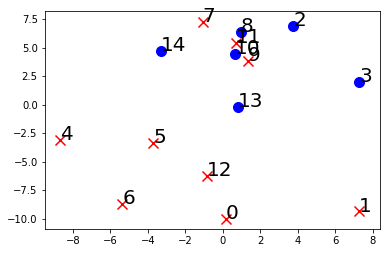

In [23]:
# 計量的MDS
nmd.set_params(metric=True)
nmd.fit(S)          # フィッティング
px = nmd.embedding_[:,0]; py = nmd.embedding_[:,1]
for i in [0,1]:     # プロット
    plt.scatter(px[pidx==i],py[pidx==i],c=col[i],marker=mk[i],s=100)
for i,(x,y) in enumerate(zip(px,py)):
    plt.annotate(str(i),(x,y),fontsize=20)    
plt.show()